In [ ]:

import pandas as pd
import io
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files 
uploaded = files.upload()


Saving Heart Attack - Spring_induction.csv to Heart Attack - Spring_induction (1).csv


In [ ]:
disease_df = pd.read_csv("/content/Heart Attack - Spring_induction.csv")
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   male  age  currentSmoker  cigsPerDay  ...    BMI  heartRate  glucose  TenYearCHD
0     1   39              0           0  ...  26.97         80       77           0
1     0   46              0           0  ...  28.73         95       76           0
2     1   48              1          20  ...  25.34         75       70           0
3     0   61              1          30  ...  28.58         65      103           1
4     0   46              1          23  ...  23.10         85       85           0

[5 rows x 13 columns] (4238, 13)
0    3594
1     644
Name: TenYearCHD, dtype: int64


Code: Ten Year’s CHD Record of all the patients available in the dataset :

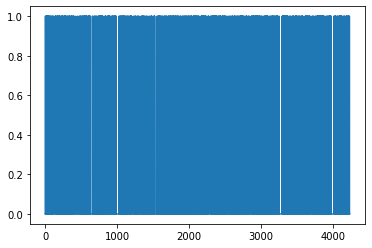

In [ ]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

Code: Counting number of patients affected by CHD where (0= Not Affected; 1= Affected) : 

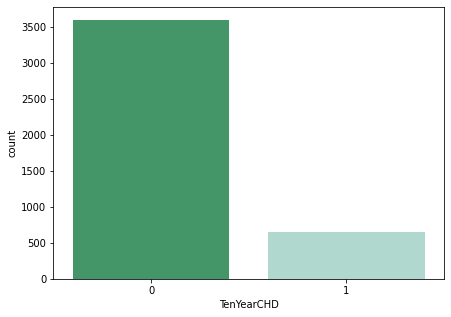

In [ ]:
plt.figure(figsize = (7, 5))
sn.countplot(x ='TenYearCHD', data = disease_df,
             palette ="BuGn_r" )
plt.show()

ode : Training and Test Sets: Splitting Data | Normalization of the Dataset 

In [ ]:
X = np.asarray(disease_df[['age', 'male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])
 
X = preprocessing.StandardScaler().fit(X).transform(X)
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3390, 6) (3390,)
Test set: (848, 6) (848,)


Code: Modeling of the Dataset | Evaluation and Accuracy : 

In [1]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import jaccard_score
print('')
print('Accuracy of the model in jaccard similarity score is = ',
      jaccard_score(y_test, y_pred))

NameError: ignored

In [2]:
from sklearn.metrics import confusion_matrix, classification_report
 
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
 
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

NameError: ignored

# New Section